<a href="https://colab.research.google.com/github/sangitaaap/FireDucks-vs-Pandas/blob/main/FireDucks_vs_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install -q -U fireducks

In [16]:
FIREDUCKS_FLAGS = "--benchmark-mode"


In [17]:
import time
import pandas as pd
import fireducks.pandas as fd
import matplotlib.pyplot as plt

In [18]:
from google.colab import files
uploaded = files.upload()

Saving winemag-data-130k-v2.csv to winemag-data-130k-v2 (1).csv


In [19]:
filename = "winemag-data-130k-v2 (1).csv" # Changed the filename to reflect the uploaded filename to fix FileNotFoundError

operations = ["Load Data", "Count NA", "Drop NA", "Query 1", "Query 2", "Query 3", "Query 4"]

# Functions for different operations
def countna(df): return df.isnull().sum()
def dropna(df): return df.dropna()
def q1(df): return df.groupby("country")["points"].mean().sort_values(ascending=False).head(10)
def q2(df): return df[df["price"] == df["price"].max()]
def q3(df): return df["variety"].value_counts().head(10)
def q4(df): return df.groupby("points")["price"].mean().sort_index()

# Ensure FireDucks executes operations
def evaluate(df):
        try:
            df._evaluate()
        except: pass # Ignore for Pandas

# function to measure execution time
def run_analysis(module, filename):
        times = []
        start_time = time.time()
        df = module.read_csv(filename)
        evaluate(df)
        times.append(time.time() - start_time)

        for func in [countna, dropna, q1, q2, q3, q4]:
            start_time = time.time()
            result = func(df)
            evaluate(result)
            times.append(time.time() - start_time)

        return times


# Run analysis
pandas_times = run_analysis(pd, filename)
# Run analysis
pandas_times = run_analysis(pd, filename)
fireducks_times = run_analysis(fd, filename)

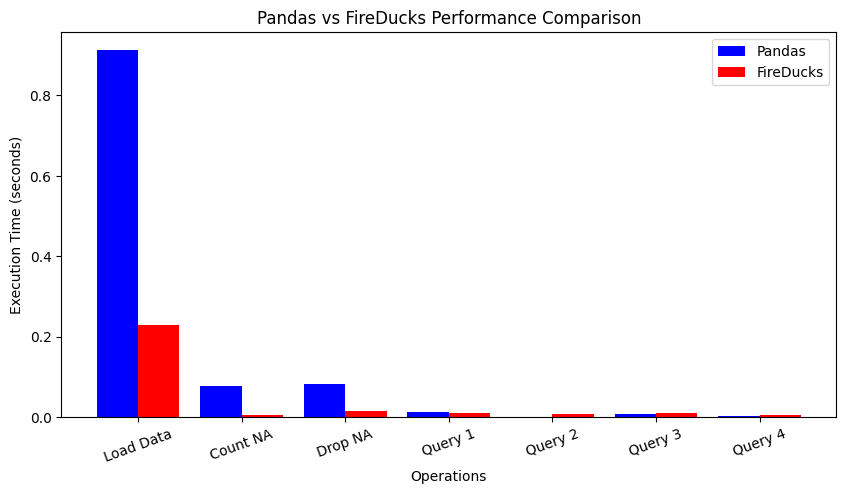

In [20]:
# Visualizing the results
plt.figure(figsize=(10, 5))
x = range(len(operations))
plt.bar(x, pandas_times, width=0.4, label="Pandas", align="center", color="blue")
plt.bar([i + 0.4 for i in x], fireducks_times, width=0.4, label="FireDucks", align="center", color="red")

# Labels and titles
plt.xlabel("Operations")
plt.ylabel("Execution Time (seconds)")
plt.title("Pandas vs FireDucks Performance Comparison")
plt.xticks([i + 0.2 for i in x], operations, rotation=20)
plt.legend()
plt.show()